In [1]:
%matplotlib widget

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
# import seaborn as sns

In [3]:
CUTOFF = [400, 450, 500, 550]

plt.style.use(['science', 'retro'])

mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'DejaVu Sans'
mpl.rcParams['mathtext.it'] = 'DejaVu Sans:italic'
mpl.rcParams['mathtext.bf'] = 'DejaVu Sans:bold'

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "DejaVu Sans"

plt.rc('text', usetex=True)
plt.rcParams['axes.linewidth'] = 1.2
mpl.rcParams['lines.linewidth'] = 2

line_styles = {"LO": {"marker": "d", "markevery": 10, "markersize": 3, "color": "tab:cyan"},
               "NLO": {"marker": ".", "markevery": 10, "color": "orange"},
               "N2LO": {"ls":  (0, (5, 3)), "color": "green"},
               "N3LO": {"ls": "dotted", "color": "blue"},
               "N4LO": {"ls": (0, (5, 2, 0.8, 2, 0.8, 2)), "color": "red"},
               "N4LO+": {"color": "black"},
               "AV18": {"ls": (0, (5, 2, 1.3, 2,)), "color": "blueviolet"},
               "SIEGERT": {"color": "blue"},
               "1NC": {"color": "deeppink", "ls": "dashed"}
               }
ls_cutoff = {400: line_styles["N4LO"],
             450: line_styles["N4LO+"],
             500: line_styles["N2LO"],
             550: line_styles["N3LO"],
             }


In [4]:
table = """
|   mt3 | orderNN   |   LambdaNN | tnforder   |    c1 |    c3 |   c4 |      cd |       ce |   cE1 |    E[MeV] |    H[MeV] |   T[MeV] |   r(p)[fm] |
|------:|:----------|-----------:|:-----------|------:|------:|-----:|--------:|---------:|------:|----------:|----------:|---------:|-----------:|
|    -1 | n2lo      |        400 | n2lo       | -0.74 | -3.61 | 2.44 |  8.0069 | -0.94276 |     0 |  -8.48233 |  -8.48307 |  33.7052 |    1.57164 |
|    -1 | n2lo      |        450 | n2lo       | -0.74 | -3.61 | 2.44 |  2.485  | -0.52793 |     0 |  -8.48274 |  -8.48355 |  36.1305 |    1.57606 |
|    -1 | n2lo      |        500 | n2lo       | -0.74 | -3.61 | 2.44 | -1.6262 | -0.0627  |     0 |  -8.48211 |  -8.48291 |  40.2661 |    1.5811  |
|    -1 | n2lo      |        550 | n2lo       | -0.74 | -3.61 | 2.44 | -6.684  |  0.8532  |     0 |  -8.47963 |  -8.48022 |  47.3425 |    1.5876  |
|    -1 | n3lo      |        400 | n2lo       | -1.2  | -4.43 | 2.67 |  3.9998 | -0.45796 |     0 |  -8.48217 |  -8.48298 |  33.7254 |    1.57859 |
|    -1 | n3lo      |        450 | n2lo       | -1.2  | -4.43 | 2.67 |  1.5281 | -0.35397 |     0 |  -8.4829  |  -8.48374 |  35.5991 |    1.57946 |
|    -1 | n3lo      |        500 | n2lo       | -1.2  | -4.43 | 2.67 | -0.4344 | -0.31055 |     0 |  -8.48345 |  -8.4843  |  37.8299 |    1.58024 |
|    -1 | n3lo      |        550 | n2lo       | -1.2  | -4.43 | 2.67 | -2.7685 | -0.12613 |     0 |  -8.48413 |  -8.48501 |  39.7825 |    1.579   |
|    -1 | n4lo      |        400 | n2lo       | -1.23 | -4.65 | 3.28 |  3.1275 | -0.44217 |     0 |  -8.48225 |  -8.48304 |  33.4426 |    1.57817 |
|    -1 | n4lo      |        450 | n2lo       | -1.23 | -4.65 | 3.28 |  0.6526 | -0.35275 |     0 |  -8.483   |  -8.48383 |  35.3486 |    1.57917 |
|    -1 | n4lo      |        500 | n2lo       | -1.23 | -4.65 | 3.28 | -1.5794 | -0.32025 |     0 |  -8.48334 |  -8.48418 |  37.8606 |    1.58044 |
|    -1 | n4lo      |        550 | n2lo       | -1.23 | -4.65 | 3.28 | -3.9867 | -0.32235 |     0 |  -8.48314 |  -8.48395 |  40.5944 |    1.58118 |
|    -1 | n4lo+     |        400 | n2lo       | -1.23 | -4.65 | 3.28 |  3.3278 | -0.45405 |     0 |  -8.48228 |  -8.48308 |  33.4598 |    1.57899 |
|    -1 | n4lo+     |        400 | n2lo       | -1.23 | -4.65 | 3.28 |  3.3278 | -0.45405 |     0 |  -8.48228 |  -8.48308 |  33.4598 |    1.57899 |
|    -1 | n4lo+     |        450 | n2lo       | -1.23 | -4.65 | 3.28 |  0.8918 | -0.38595 |     0 |  -8.48312 |  -8.48395 |  35.4629 |    1.58014 |
|    -1 | n4lo+     |        500 | n2lo       | -1.23 | -4.65 | 3.28 | -1.2788 | -0.38214 |     0 |  -8.48365 |  -8.48449 |  38.0782 |    1.58158 |
|    -1 | n4lo+     |        550 | n2lo       | -1.23 | -4.65 | 3.28 | -3.6257 | -0.41022 |     0 |  -8.48373 |  -8.48455 |  40.9461 |    1.58252 |
|    -1 | lo        |        400 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 | -11.6507  | -11.6508  |  45.9149 |    1.3001  |
|    -1 | lo        |        450 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 | -12.2254  | -12.2254  |  52.388  |    1.25024 |
|    -1 | lo        |        500 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 | -12.5168  | -12.5167  |  57.8489 |    1.22429 |
|    -1 | lo        |        550 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 | -12.5164  | -12.5163  |  62.0065 |    1.21854 |
|    -1 | n2lo      |        400 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 |  -8.41743 |  -8.41817 |  33.7393 |    1.56128 |
|    -1 | n2lo      |        450 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 |  -8.1429  |  -8.14375 |  34.9397 |    1.59482 |
|    -1 | n2lo      |        500 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 |  -7.91892 |  -7.91981 |  37.936  |    1.6243  |
|    -1 | n2lo      |        550 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 |  -7.78435 |  -7.78509 |  43.831  |    1.64666 |
|    -1 | n3lo      |        400 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 |  -8.24887 |  -8.24971 |  33.111  |    1.58845 |
|    -1 | n3lo      |        450 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 |  -8.06746 |  -8.06835 |  34.1913 |    1.60615 |
|    -1 | n3lo      |        500 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 |  -7.91696 |  -7.91789 |  35.6436 |    1.62142 |
|    -1 | n3lo      |        550 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 |  -7.77748 |  -7.77847 |  36.8009 |    1.63493 |
|    -1 | n4lo      |        400 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 |  -8.33282 |  -8.33364 |  33.0577 |    1.58128 |
|    -1 | n4lo      |        450 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 |  -8.16526 |  -8.16613 |  34.2174 |    1.59716 |
|    -1 | n4lo      |        500 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 |  -8.03258 |  -8.03349 |  35.9672 |    1.61065 |
|    -1 | n4lo      |        550 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 |  -7.93688 |  -7.93778 |  37.9569 |    1.62061 |
|    -1 | n4lo+     |        400 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 |  -8.31072 |  -8.31154 |  33.0162 |    1.58369 |
|    -1 | n4lo+     |        450 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 |  -8.14122 |  -8.14211 |  34.2636 |    1.59974 |
|    -1 | n4lo+     |        500 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 |  -7.99976 |  -8.00067 |  36.0801 |    1.61403 |
|    -1 | n4lo+     |        550 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 |  -7.88582 |  -7.88674 |  38.1188 |    1.62569 |
|    -1 | nlo       |        400 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 |  -8.70053 |  -8.70115 |  33.6349 |    1.53726 |
|    -1 | nlo       |        450 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 |  -8.51566 |  -8.51636 |  34.3132 |    1.55581 |
|    -1 | nlo       |        500 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 |  -8.32438 |  -8.32507 |  35.8654 |    1.57452 |
|    -1 | nlo       |        550 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 |  -8.03966 |  -8.04013 |  38.7802 |    1.60182 |
|     1 | n2lo      |        400 | n2lo       | -0.74 | -3.61 | 2.44 |  8.0069 | -0.94276 |     0 |  -7.72919 |  -7.73008 |  32.9708 |    1.76157 |
|     1 | n2lo      |        450 | n2lo       | -0.74 | -3.61 | 2.44 |  2.485  | -0.52793 |     0 |  -7.73432 |  -7.73528 |  35.3712 |    1.76649 |
|     1 | n2lo      |        500 | n2lo       | -0.74 | -3.61 | 2.44 | -1.6262 | -0.0627  |     0 |  -7.73888 |  -7.73983 |  39.4428 |    1.77217 |
|     1 | n2lo      |        550 | n2lo       | -0.74 | -3.61 | 2.44 | -6.684  |  0.8532  |     0 |  -7.74286 |  -7.7436  |  46.3917 |    1.77927 |
|     1 | n3lo      |        400 | n2lo       | -1.2  | -4.43 | 2.67 |  3.9998 | -0.45796 |     0 |  -7.73499 |  -7.73595 |  33.0064 |    1.76856 |
|     1 | n3lo      |        450 | n2lo       | -1.2  | -4.43 | 2.67 |  1.5281 | -0.35397 |     0 |  -7.73682 |  -7.7378  |  34.851  |    1.77018 |
|     1 | n3lo      |        500 | n2lo       | -1.2  | -4.43 | 2.67 | -0.4344 | -0.31055 |     0 |  -7.73817 |  -7.73917 |  37.0365 |    1.77216 |
|     1 | n3lo      |        550 | n2lo       | -1.2  | -4.43 | 2.67 | -2.7685 | -0.12613 |     0 |  -7.73762 |  -7.73865 |  38.9419 |    1.77247 |
|     1 | n4lo      |        400 | n2lo       | -1.23 | -4.65 | 3.28 |  3.1275 | -0.44217 |     0 |  -7.73638 |  -7.73733 |  32.7304 |    1.76762 |
|     1 | n4lo      |        450 | n2lo       | -1.23 | -4.65 | 3.28 |  0.6526 | -0.35275 |     0 |  -7.73938 |  -7.74036 |  34.6108 |    1.76923 |
|     1 | n4lo      |        500 | n2lo       | -1.23 | -4.65 | 3.28 | -1.5794 | -0.32025 |     0 |  -7.74283 |  -7.74382 |  37.0777 |    1.77081 |
|     1 | n4lo      |        550 | n2lo       | -1.23 | -4.65 | 3.28 | -3.9867 | -0.32235 |     0 |  -7.74584 |  -7.7468  |  39.7523 |    1.77179 |
|     1 | n4lo+     |        400 | n2lo       | -1.23 | -4.65 | 3.28 |  3.3278 | -0.45405 |     0 |  -7.73596 |  -7.73691 |  32.7454 |    1.76846 |
|     1 | n4lo+     |        400 | n2lo       | -1.23 | -4.65 | 3.28 |  3.3278 | -0.45405 |     0 |  -7.73596 |  -7.73691 |  32.7454 |    1.76846 |
|     1 | n4lo+     |        450 | n2lo       | -1.23 | -4.65 | 3.28 |  0.8918 | -0.38595 |     0 |  -7.73967 |  -7.74066 |  34.723  |    1.76999 |
|     1 | n4lo+     |        500 | n2lo       | -1.23 | -4.65 | 3.28 | -1.2788 | -0.38214 |     0 |  -7.7438  |  -7.74479 |  37.2941 |    1.77163 |
|     1 | n4lo+     |        550 | n2lo       | -1.23 | -4.65 | 3.28 | -3.6257 | -0.41022 |     0 |  -7.74761 |  -7.74858 |  40.105  |    1.77274 |
|     1 | lo        |        400 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 | -10.7769  | -10.777   |  45.0287 |    1.40467 |
|     1 | lo        |        450 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 | -11.3396  | -11.3396  |  51.4526 |    1.34235 |
|     1 | lo        |        500 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 | -11.6309  | -11.6308  |  56.8793 |    1.30779 |
|     1 | lo        |        550 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 | -11.6396  | -11.6395  |  61.0138 |    1.29667 |
|     1 | n2lo      |        400 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 |  -7.64975 |  -7.65064 |  32.9485 |    1.75513 |
|     1 | n2lo      |        450 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 |  -7.39685 |  -7.39788 |  34.153  |    1.79664 |
|     1 | n2lo      |        500 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 |  -7.19196 |  -7.19304 |  37.1065 |    1.83329 |
|     1 | n2lo      |        550 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 |  -7.07261 |  -7.07355 |  42.8927 |    1.86031 |
|     1 | n3lo      |        400 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 |  -7.50115 |  -7.50216 |  32.3639 |    1.78628 |
|     1 | n3lo      |        450 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 |  -7.32858 |  -7.32965 |  33.4218 |    1.81042 |
|     1 | n3lo      |        500 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 |  -7.18503 |  -7.18616 |  34.8349 |    1.83177 |
|     1 | n3lo      |        550 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 |  -7.05108 |  -7.05227 |  35.9552 |    1.85141 |
|     1 | n4lo      |        400 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 |  -7.58295 |  -7.58394 |  32.3182 |    1.77593 |
|     1 | n4lo      |        450 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 |  -7.42397 |  -7.42501 |  33.4572 |    1.79752 |
|     1 | n4lo      |        500 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 |  -7.29893 |  -7.30001 |  35.1671 |    1.81545 |
|     1 | n4lo      |        550 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 |  -7.20905 |  -7.21013 |  37.1022 |    1.82862 |
|     1 | n4lo+     |        400 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 |  -7.5611  |  -7.56209 |  32.2736 |    1.7791  |
|     1 | n4lo+     |        450 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 |  -7.40071 |  -7.40176 |  33.4998 |    1.80078 |
|     1 | n4lo+     |        500 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 |  -7.26747 |  -7.26856 |  35.2762 |    1.81975 |
|     1 | n4lo+     |        550 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 |  -7.16034 |  -7.16145 |  37.2615 |    1.83527 |
|     1 | nlo       |        400 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 |  -7.92221 |  -7.92298 |  32.8651 |    1.721   |
|     1 | nlo       |        450 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 |  -7.75075 |  -7.7516  |  33.5517 |    1.74404 |
|     1 | nlo       |        500 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 |  -7.5724  |  -7.57325 |  35.0727 |    1.76777 |
|     1 | nlo       |        550 | no3nf      |  0    |  0    | 0    |  0      |  0       |     0 |  -7.30549 |  -7.30612 |  37.8913 |    1.80335 |
"""


In [5]:
result = []

for n, line in enumerate(table[1:-1].split('\n')):
    data = {}
    if n == 0:
        header = [t.strip() for t in line.split('|')[1:-1]]
    if n > 1:
        values = [t.strip() for t in line.split('|')[1:-1]]
        for col, value in zip(header, values):
            data[col] = value
        result.append(data)

In [6]:
df=pd.json_normalize(result)

In [7]:
df["orderNN"] = df["orderNN"].astype("category")
df["orderNN"] = df["orderNN"].cat.set_categories(["lo", "nlo", "n2lo", "n3lo", "n4lo", "n4lo+"])


In [8]:
df.sort_values(["orderNN"], inplace=True)


In [9]:
import seaborn as sns

In [18]:
df["r(p)[fm]"] = df["r(p)[fm]"].astype(float)
df["T[MeV]"] = df["T[MeV]"].astype(float)
df["E[MeV]"] = df["E[MeV]"].astype(float)

/tmp/ipykernel_2585539/315380655.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


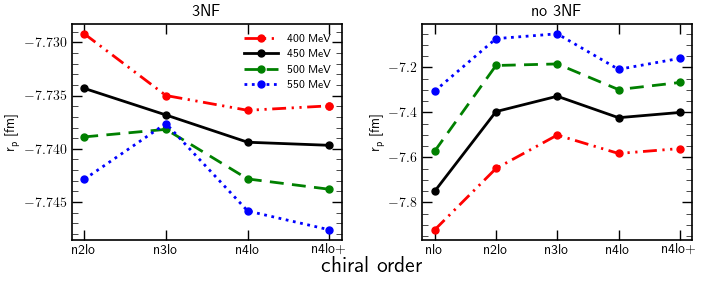

In [19]:
fig = plt.figure(figsize=(8, 2.8))
gs = fig.add_gridspec(ncols=2, wspace=0.3)
axes = gs.subplots(sharey=False)
# fig.suptitle(f"Exclusive at energy 120[MeV]")
# fig.supylabel(
#     "d$\sigma$/d$\Omega_d$ [fm$^2$ sr$^{-1}$]", x=0.03, y=0.6, size=12)
fig.supxlabel("chiral order", y=-0.02, size=16)

mt = "1"
df_tmp1 = df[(
    df["mt3"] == mt) & (df["tnforder"] == "n2lo")]
df_tmp2 = df[(
    df["mt3"] == mt) & (df["tnforder"] == "no3nf") & (df["orderNN"] != "lo")]
for cut in range(1, 5):
    cutoff = str(350+50*cut)
    axes[0].plot(df_tmp1[df_tmp1["LambdaNN"] == cutoff].orderNN, df_tmp1[df_tmp1["LambdaNN"] == cutoff]["E[MeV]"],
                 label=f"{cutoff} MeV",
             **ls_cutoff[int(cutoff)], marker=".", markersize=10)
    axes[1].plot(df_tmp2[df_tmp2["LambdaNN"] == cutoff].orderNN,
                 df_tmp2[df_tmp2["LambdaNN"] == cutoff]["E[MeV]"],
                 label=f"{cutoff} MeV",
             **ls_cutoff[int(cutoff)], marker=".", markersize=10)

    # ax[1].plot(df_cuts[f"{cut}_{particle}"] .energy, df_cuts[f"{cut}_{particle}"] .dGdE*factor,
    #             **ls_cutoff[cutoff], label=f"{cutoff} MeV")
for ax in axes:
    ax.tick_params(axis="y", which='minor', direction='in',
                    length=4, width=0.5, top=True, right=True)
    ax.tick_params(axis="x", which='minor', length=0)
    ax.tick_params(which='major', direction='in',
                    length=7, width=1, top=True, right=True)
    ax.set_ylabel("r$_\\text{p}$ [fm]")
# plt.xlabel("chiral order")
axes[0].legend(fontsize=8, handlelength=3)
axes[0].set_title("3NF")
axes[1].set_title("no 3NF")
plt.tight_layout()

# plt.savefig(f"./figures/proton_radius_mt3{mt}_3NF.pdf",
#             dpi=600, facecolor="white")
plt.show()

/tmp/ipykernel_2585539/2015264492.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


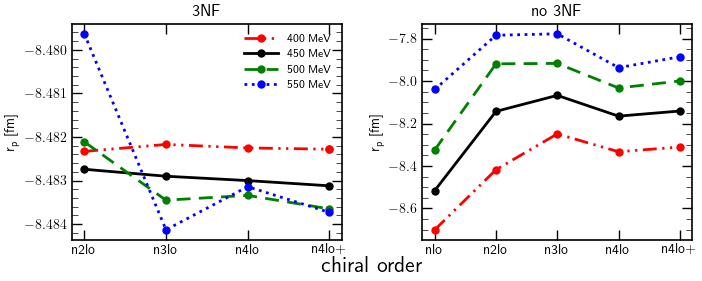

In [20]:
fig = plt.figure(figsize=(8, 2.8))
gs = fig.add_gridspec(ncols=2, wspace=0.3)
axes = gs.subplots(sharey=False)
# fig.suptitle(f"Exclusive at energy 120[MeV]")
# fig.supylabel(
#     "d$\sigma$/d$\Omega_d$ [fm$^2$ sr$^{-1}$]", x=0.03, y=0.6, size=12)
fig.supxlabel("chiral order", y=-0.02, size=16)

mt = "-1"
df_tmp1 = df[(
    df["mt3"] == mt) & (df["tnforder"] == "n2lo")]
df_tmp2 = df[(
    df["mt3"] == mt) & (df["tnforder"] == "no3nf") & (df["orderNN"] != "lo")]
for cut in range(1, 5):
    cutoff = str(350+50*cut)
    axes[0].plot(df_tmp1[df_tmp1["LambdaNN"] == cutoff].orderNN, df_tmp1[df_tmp1["LambdaNN"] == cutoff]["E[MeV]"],
                 label=f"{cutoff} MeV",
             **ls_cutoff[int(cutoff)], marker=".", markersize=10)
    axes[1].plot(df_tmp2[df_tmp2["LambdaNN"] == cutoff].orderNN,
                 df_tmp2[df_tmp2["LambdaNN"] == cutoff]["E[MeV]"],
                 label=f"{cutoff} MeV",
             **ls_cutoff[int(cutoff)], marker=".", markersize=10)

    # ax[1].plot(df_cuts[f"{cut}_{particle}"] .energy, df_cuts[f"{cut}_{particle}"] .dGdE*factor,
    #             **ls_cutoff[cutoff], label=f"{cutoff} MeV")
for ax in axes:
    ax.tick_params(axis="y", which='minor', direction='in',
                    length=4, width=0.5, top=True, right=True)
    ax.tick_params(axis="x", which='minor', length=0)
    ax.tick_params(which='major', direction='in',
                    length=7, width=1, top=True, right=True)
    ax.set_ylabel("r$_\\text{p}$ [fm]")
# plt.xlabel("chiral order")
axes[0].legend(fontsize=8, handlelength=3)
axes[0].set_title("3NF")
axes[1].set_title("no 3NF")
plt.tight_layout()

plt.savefig(f"./figures/proton_radius_mt3{mt}_3NF.pdf",
            dpi=600, facecolor="white")
plt.show()

In [12]:
df_tmp2[df_tmp2["LambdaNN"] == "550"]

,mt3,orderNN,LambdaNN,tnforder,c1,c3,c4,cd,ce,cE1,E[MeV],H[MeV],T[MeV],r(p)[fm]
40,-1,nlo,550,no3nf,0,0,0,0,0,0,-8.03966,-8.04013,38.7802,1.60182
24,-1,n2lo,550,no3nf,0,0,0,0,0,0,-7.78435,-7.78509,43.831,1.64666
28,-1,n3lo,550,no3nf,0,0,0,0,0,0,-7.77748,-7.77847,36.8009,1.63493
32,-1,n4lo,550,no3nf,0,0,0,0,0,0,-7.93688,-7.93778,37.9569,1.62061
36,-1,n4lo+,550,no3nf,0,0,0,0,0,0,-7.88582,-7.88674,38.1188,1.62569
